In [1]:
import csv
import os
import numpy as np
from envs.utils import printoptions
from matplotlib.backends.backend_pdf import PdfPages


%pylab inline
import matplotlib.pyplot as plt


def get_stats(algorithm="mceirl", env="room", spec="default", comb="use_prior", param_tuned='k', path="./results/tuning-mceirl"):
    results_list=[]
    for file in os.listdir(path):
        if algorithm in file and env in file and spec in file and comb in file and "-"+param_tuned in file:
            #print(os.path.join("./results", file))

            with open(os.path.join(path, file), 'rt') as f:
                reader = csv.reader(f)
                # the first line is names of returned items, e g [seed, true_r, final_r]
                list_results = list(reader)[1::]
                list_rewards = []
                for res in list_results:
                    list_rewards.append(float(res[1]))
                list_rewards = np.asarray(list_rewards)

                param_val = file.split('-'+param_tuned+'=', 1)[-1]
                param_val = param_val.split('-')[0]

                results_list.append([float(param_val), np.mean(list_rewards), np.std(list_rewards)])
    results_list = np.asarray(results_list)
    # return a list sorted by the value of k
    return results_list[results_list[:,0].argsort()]


def plot_params_multiple_one_plot(stats_list_per_env, 
                         c='b', color_list=['blue', 'orange', '#5177d6', '#ffe500'], 
                         env_names=[' room', ' room', ' train', ' train'], 
                         comb=['prior', 'addition','prior', 'addition'],
                         title=''):
    ticks_string=[]
    for i in stats_list_per_env[0][0][:,0]: 
        ticks_string.append(str(i))
        
    plt.figure(figsize=(6*len(stats_list_per_env), 4))
    for j, stats_list in enumerate(stats_list_per_env):
        ax = plt.subplot(1, len(stats_list_per_env), j+1)
        stats_stack = np.vstack(stats_list)
        y_min = np.amin(stats_stack[:,1] - stats_stack[:,2]) - .1
        y_max = np.amax(stats_stack[:,1] + stats_stack[:,2]) + .1

        for i in range(len(stats_list)):
            if color_list is not None:
                c = color_list[i]

            stats = stats_list[i]
            
            ax.set_ylim(y_min, y_max)
            ax.scatter(np.log2(stats[:,0]), stats[:,1], color=c, edgecolor=c, s=40, label=comb[i]+env_names[i])

            #ax.errorbar(np.log2(stats[:,0]), stats[:,1], yerr=[stats[:,2], stats[:,2]], 
            #                alpha=0.5, color=c, fmt='-o', capthick=3)

            ax.plot(np.log2(stats[:,0]), stats[:,1], color=c)
            #ax.semilogx(stats[:,0], stats[:,1], color=c, label = comb[i], base=2)
            
            plt.xticks(np.log2(stats[:,0]), ticks_string, size='small')
            plt.xlabel("k")
            plt.ylabel("R")
            plt.legend(loc="best")
        if title!='': plt.title(title)
    pp = PdfPages('results/prior_vs_addition_'+title+'.pdf')
    pp.savefig()
    pp.close()
    plt.show()

Populating the interactive namespace from numpy and matplotlib


C:\Users\dmkr0\Anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['printoptions']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Adding rewards vs prior in the room env

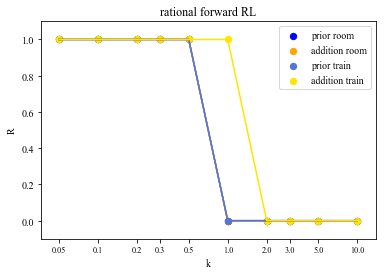

In [113]:
# temp=None (rational agent)
stats_list_per_env_t0 = [[get_stats("mceirl", "room", "default", "use_prior", "k",  "./results/use_prior_vs_add_r_t0"), 
                      get_stats("mceirl", "room", "default", "add_rewards", "k",  "./results/use_prior_vs_add_r_t0"),
                      get_stats("mceirl", "train", "default", "use_prior", "k",  "./results/use_prior_vs_add_r_t0"), 
                      get_stats("mceirl", "train", "default", "add_rewards", "k",  "./results/use_prior_vs_add_r_t0")]]

plot_params_multiple_one_plot(stats_list_per_env_t0, title="rational forward RL")

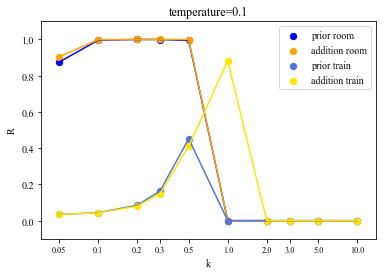

In [114]:
# temp=.1
stats_list_per_env_t01 = [[get_stats("mceirl", "room", "default", "use_prior", "k",  "./results/use_prior_vs_add_r_t01"), 
                      get_stats("mceirl", "room", "default", "add_rewards", "k",  "./results/use_prior_vs_add_r_t01"),
                      get_stats("mceirl", "train", "default", "use_prior", "k",  "./results/use_prior_vs_add_r_t01"), 
                      get_stats("mceirl", "train", "default", "add_rewards", "k",  "./results/use_prior_vs_add_r_t01")]]

plot_params_multiple_one_plot(stats_list_per_env_t01, title="temperature=0.1")

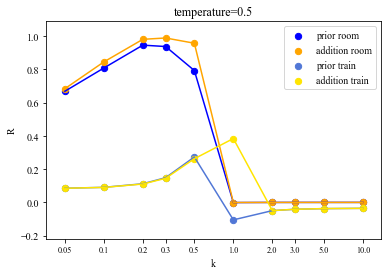

In [115]:
# temp=.5
stats_list_per_env_t05 = [[get_stats("mceirl", "room", "default", "use_prior", "k",  "./results/use_prior_vs_add_r_t05"), 
                      get_stats("mceirl", "room", "default", "add_rewards", "k",  "./results/use_prior_vs_add_r_t05"),
                      get_stats("mceirl", "train", "default", "use_prior", "k",  "./results/use_prior_vs_add_r_t05"), 
                      get_stats("mceirl", "train", "default", "add_rewards", "k",  "./results/use_prior_vs_add_r_t05")]]

plot_params_multiple_one_plot(stats_list_per_env_t05, title="temperature=0.5")

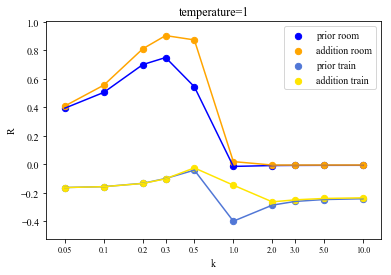

In [116]:
# temp=1
stats_list_per_env_t1 = [[get_stats("mceirl", "room", "default", "use_prior", "k",  "./results/use_prior_vs_add_r_t1"), 
                      get_stats("mceirl", "room", "default", "add_rewards", "k",  "./results/use_prior_vs_add_r_t1"),
                      get_stats("mceirl", "train", "default", "use_prior", "k",  "./results/use_prior_vs_add_r_t1"), 
                      get_stats("mceirl", "train", "default", "add_rewards", "k",  "./results/use_prior_vs_add_r_t1")]]

plot_params_multiple_one_plot(stats_list_per_env_t1, title="temperature=1")

### Now all in one plot

In [129]:
def plot_params_multiple_one_subplot(stats_list_per_env, ax,
                         c='b', color_list=['blue', 'orange', '#5177d6', '#ffe500'], 
                         env_names=[' room', ' room', ' train', ' train'], 
                         comb=['Bayesian,', 'Additive,','Bayesian,', 'Additive,'],
                         title='',
                         current_subplot=None,
                         total_subplots=None):
    ticks_string=[]
    for i in stats_list_per_env[0][0][:,0]: 
        ticks_string.append(str(i))
        
    #plt.figure(figsize=(6*len(stats_list_per_env), 4))
    for j, stats_list in enumerate(stats_list_per_env):
        #ax = plt.subplot(1, len(stats_list_per_env), j+1)
        stats_stack = np.vstack(stats_list)
        #y_min = np.amin(stats_stack[:,1] - stats_stack[:,2]) - .1
        #y_max = np.amax(stats_stack[:,1] + stats_stack[:,2]) + .1
        
        y_min = -0.45
        y_max = 1.05
        
        
        for i in range(len(stats_list)):
            if color_list is not None:
                c = color_list[i]

            stats = stats_list[i]
            
            ax.set_ylim(y_min, y_max)
            ax.scatter(np.log2(stats[:,0]), stats[:,1], color=c, edgecolor=c, s=40, label=comb[i]+env_names[i])

            #ax.errorbar(np.log2(stats[:,0]), stats[:,1], yerr=[stats[:,2], stats[:,2]], 
            #                alpha=0.5, color=c, fmt='-o', capthick=3)

            ax.plot(np.log2(stats[:,0]), stats[:,1], color=c)
            #ax.semilogx(stats[:,0], stats[:,1], color=c, label = comb[i], base=2)
            
            plt.tick_params(axis='both', labelsize=12)

            #plt.xticks(np.log2(stats[:,0]), ticks_string)
            ax.tick_params(axis='both', labelsize='large')

            plt.xticks(np.log2(stats[::3,0]), ticks_string[0::3])
            if current_subplot==1:
                plt.xlabel("Standard deviation", fontsize=21)
            if current_subplot==0:
                plt.ylabel("Fraction of max reward", fontsize=21)
            if current_subplot+1==total_subplots:
                handles, labels = ax.get_legend_handles_labels()
                # sort both labels and handles by labels
                labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
                #ax.legend()
                plt.legend(handles, labels, loc="best", fontsize=15, handletextpad=-0.4)
        if title!='': plt.title(title, fontsize=24)


def plot_params_multiple(env_lists_per_t, titles_list=None, figname=''):
    if titles_list is None: titles_list = ['']*len(env_lists_per_t)
        
    fig = plt.figure(figsize=(5*len(env_lists_per_t), 4))
    for j, stats_list in enumerate(env_lists_per_t):
        ax = plt.subplot(1, len(env_lists_per_t), j+1)
        plot_params_multiple_one_subplot(stats_list, ax, title=titles_list[j], current_subplot=j, total_subplots=len(env_lists_per_t))
    #fig.suptitle(r"$\bf{Comparison\ of\ the\ methods\ for\ combining\ } \theta_{spec} \ and\  \theta_{H} $", fontsize=26, y=1.1, fontweight='bold')
    
    fig.subplots_adjust(top=1.1)
    plt.tight_layout()
    
    pp = PdfPages('results/prior_vs_addition_all'+figname+'.pdf')
    pp.savefig()
    pp.close()
    
    plt.show()

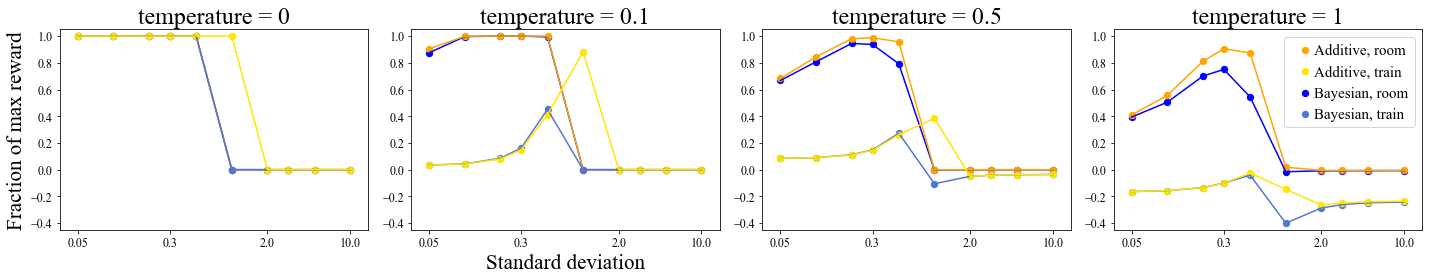

In [130]:
env_lists_per_t = [stats_list_per_env_t0, stats_list_per_env_t01, stats_list_per_env_t05, stats_list_per_env_t1]
titles_list = ['temperature = 0','temperature = 0.1','temperature = 0.5','temperature = 1']

plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.family"] = "Times New Roman"
plot_params_multiple(env_lists_per_t, titles_list=titles_list, figname='')

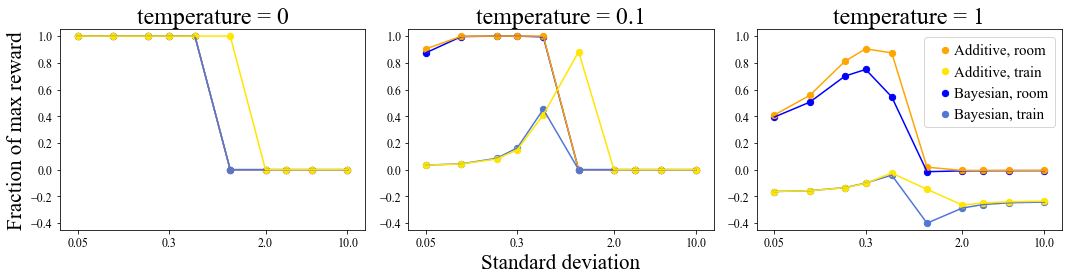

In [131]:
env_lists_per_t = [stats_list_per_env_t0, stats_list_per_env_t01, stats_list_per_env_t1]
titles_list = ['temperature = 0','temperature = 0.1','temperature = 1']

plt.rcParams["font.family"] = "Times New Roman"
plot_params_multiple(env_lists_per_t, titles_list=titles_list, figname='_x3')